<a href="https://colab.research.google.com/github/hrmufid/Mini-Project-3/blob/main/Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import shap

import warnings
warnings.filterwarnings('ignore')

In [3]:
# initialize random state
random_state = 42

# set plot style for whole notebook
sns.set_style('darkgrid')

In [4]:
# IMPORT DATA
data = pd.read_csv('https://raw.githubusercontent.com/hrmufid/Mini-Project-3/main/marketing_campaign_data.csv')

df = data.copy()
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

## Context
Anda diberikan tanggung jawab untuk mengolah data historical marketing campaign guna menaikkan performa dan menyasar customer yang tepat agar dapat bertransaksi di platform perusahaan. Disini anda akan belajar Bagaimana mengolah data, membersihkan data, membuat machine learning model, dan mengambil kesimpulan dan insight bisnis yang dapat direkomendasikan terkait marketing campaign yang berjalan.

## 1.1 Descriptive Analysis

In [5]:
# check columns and NULL / Non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

**Kolom Income memiliki nilai NULL** <br>

Nilai income yang kosong ini nanti bisa asumsikan berdasarkan nilai mean, mode ataupun estimasi yang lain, bisa juga dihilangkan (namun melihat jumlah data yang ada sepertinya tidak bisa dihilangkan)

In [6]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# cek apakah ada data customer yang duplicate
df[df['ID'].duplicated()]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


**Tidak ada data customer yang duplicated**

In [9]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2.216000e+03,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,5.224725e+07,0.44,0.51,49.11,303935.71,26302.23,166950.00,37525.45,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,2.517308e+07,0.54,0.54,28.96,336597.39,39773.43,225715.37,54628.98,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1.730000e+06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,3.530300e+07,0.00,0.00,24.00,23750.00,1000.00,16000.00,3000.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,5.138150e+07,0.00,0.00,49.00,173500.00,8000.00,67000.00,12000.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,6.852200e+07,1.00,1.00,74.00,504250.00,33000.00,232000.00,50000.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,6.666660e+08,2.00,2.00,99.00,1493000.00,199000.00,1725000.00,259000.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


In [10]:
# categoricals columns
cat = df.select_dtypes(include=['object'])
cat.describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


In [11]:
# ubah semua kolom menjadi huruf kecil
df.columns = df.columns.str.lower()
df.rename(columns=lambda x: x.lower(), inplace=True)
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


conversion rate = jumlah response / num web visits month

In [12]:
# buat kolom baru ['conversion_rate']
df['conversion_rate'] = df['response'] / df['numwebvisitsmonth']
df.sample(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,conversion_rate
1955,6428,1950,S3,Janda,76842000.0,0,0,03-05-2014,37,605000,...,0,0,0,0,0,0,3,11,0,NaN
2113,3969,1974,S2,Bertunangan,43018000.0,0,1,01-11-2013,46,35000,...,0,0,0,0,0,0,3,11,0,0.0
1232,1307,1978,S1,Cerai,41986000.0,0,1,09-02-2014,15,27000,...,0,0,0,0,0,0,3,11,0,0.0
162,8182,1984,S1,Menikah,23228000.0,1,0,05-01-2014,91,53000,...,0,0,0,0,0,0,3,11,0,0.0
2101,6544,1949,S3,Bertunangan,67911000.0,0,1,22-05-2014,63,529000,...,0,0,0,0,0,0,3,11,0,0.0


In [13]:
df.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntcoke                 0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
conversion_rate        11
dtype: int64

**Pada kolom conversion_rate ada nilai yang NULL, sedangkan rumus yang berlaku adalah response / web visits. Kemungkinan yang terjadi adalah nilai response dan nilai web visits bernilai 0, sehingga operasi yang dilakukan python tidak bisa dilakukan dan nilai conversion_rate yang akan muncul adalah NULL** <br>

Dari hal ini, harus dilakukan cleaning data. Bisa diganti dengan angka 0 saja

In [14]:
# # Melacak baris ke berapa nilai None ada dalam DataFrame (Optional)
# rows_with_null = df.isnull().any(axis=1)
# rows_with_null_indexes = rows_with_null[rows_with_null].index

# print("Baris dengan nilai None:")
# for index in rows_with_null_indexes:
#     print(index)

In [15]:
# buat kolom baru ['umur']
import datetime

current_year = datetime.datetime.now().year
df['umur'] = df['year_birth'].apply(lambda year: current_year - year)
df.sample(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,conversion_rate,umur
785,4211,1986,SMA,Menikah,20425000.0,1,0,29-10-2012,5,4000,...,0,0,0,0,0,3,11,0,0.0,37
1159,640,1951,S1,Menikah,57304000.0,0,1,11-03-2013,61,356000,...,0,0,0,0,0,3,11,0,0.0,72
1487,5529,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,...,0,0,1,0,0,3,11,0,0.0,77
1503,3594,1973,S2,Menikah,54108000.0,1,1,05-11-2012,74,539000,...,0,0,0,0,0,3,11,0,0.0,50
276,3445,1956,S1,Lajang,60714000.0,0,0,17-01-2013,56,216000,...,0,0,0,0,0,3,11,1,0.2,67


In [16]:
# Membuat kolom total_pengeluaran dan total_transaksi

df['total_pengeluaran'] = df['mntcoke'] + df['mntfishproducts'] + df['mntfruits'] + df['mntgoldprods'] + df['mntmeatproducts'] + df['mntsweetproducts']
print(df['total_pengeluaran'].sample(10))

345      940000
1300      59000
1336    1149000
586     1867000
38        67000
1091     133000
7        169000
1349    1313000
1876     835000
1134    2013000
Name: total_pengeluaran, dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntcoke              2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

In [18]:
number = ['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth' ]
df[number].sum()

numdealspurchases       5208
numwebpurchases         9150
numcatalogpurchases     5963
numstorepurchases      12970
numwebvisitsmonth      11909
dtype: int64

## 1.2 Univariate Analysis

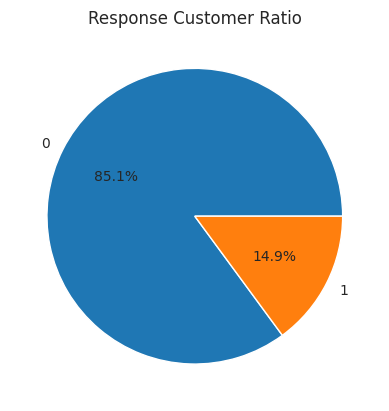

In [19]:
# check ratio of on-time vs late deliveries
df.groupby('response').size().plot(kind='pie', autopct='%.1f%%')

plt.title('Response Customer Ratio')
plt.show()

In [20]:
df['response'].unique()

array([1, 0])

Sebesar 14.9% customer meresponse sedangkan 85.1% customer tidak meresponse

In [21]:
num = df.select_dtypes(include=['int', 'float'])

In [22]:
num_df = num.columns
print(num_df)

Index(['id', 'year_birth', 'income', 'kidhome', 'teenhome', 'recency',
       'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response', 'conversion_rate', 'umur',
       'total_pengeluaran'],
      dtype='object')


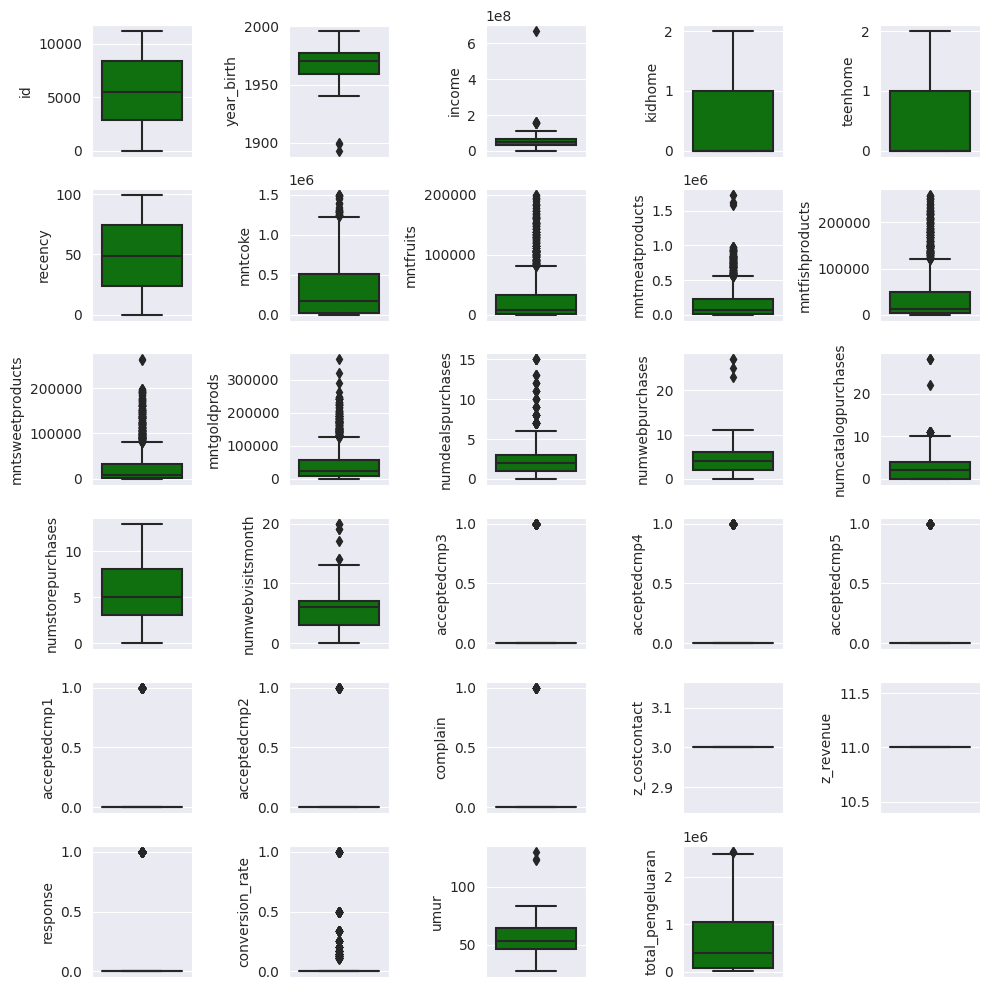

In [23]:
features = num_df
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
  plt.subplot(6, 5, i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

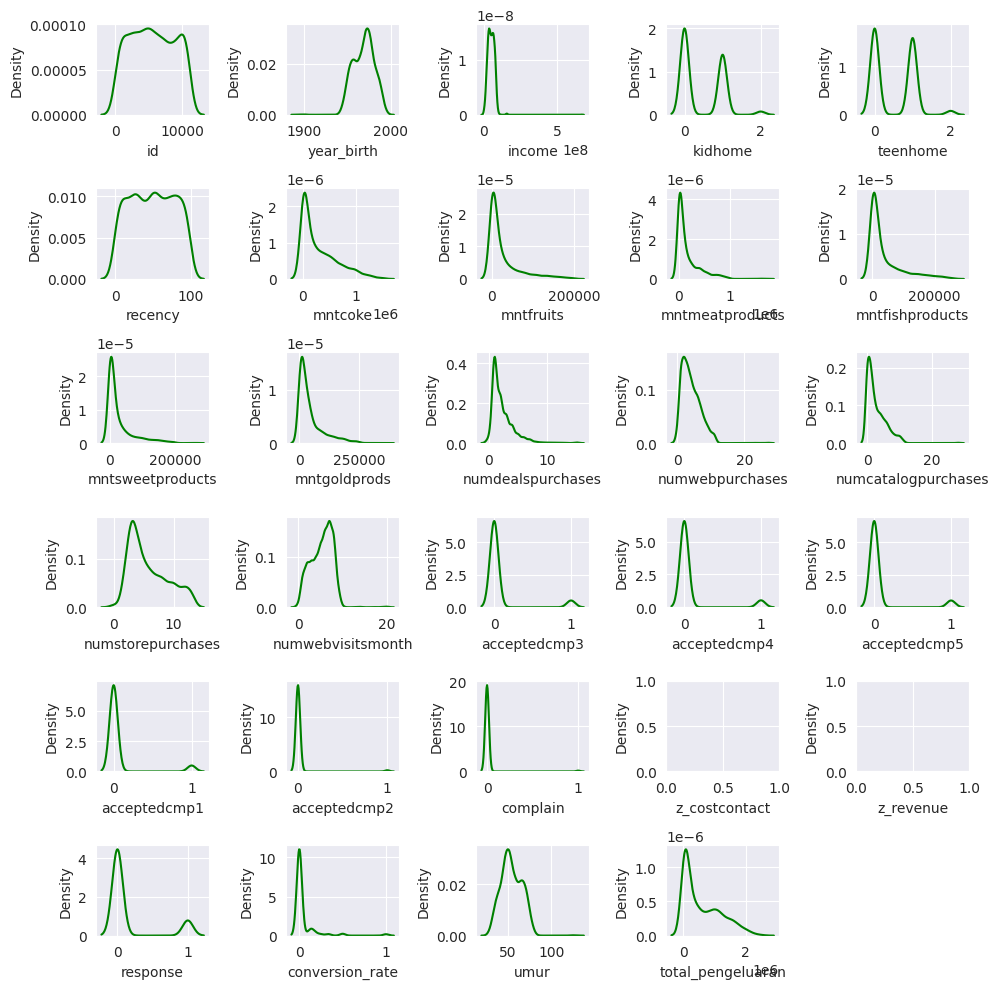

In [29]:
features = num_df
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
  plt.subplot(6, 5, i+1)
  sns.kdeplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

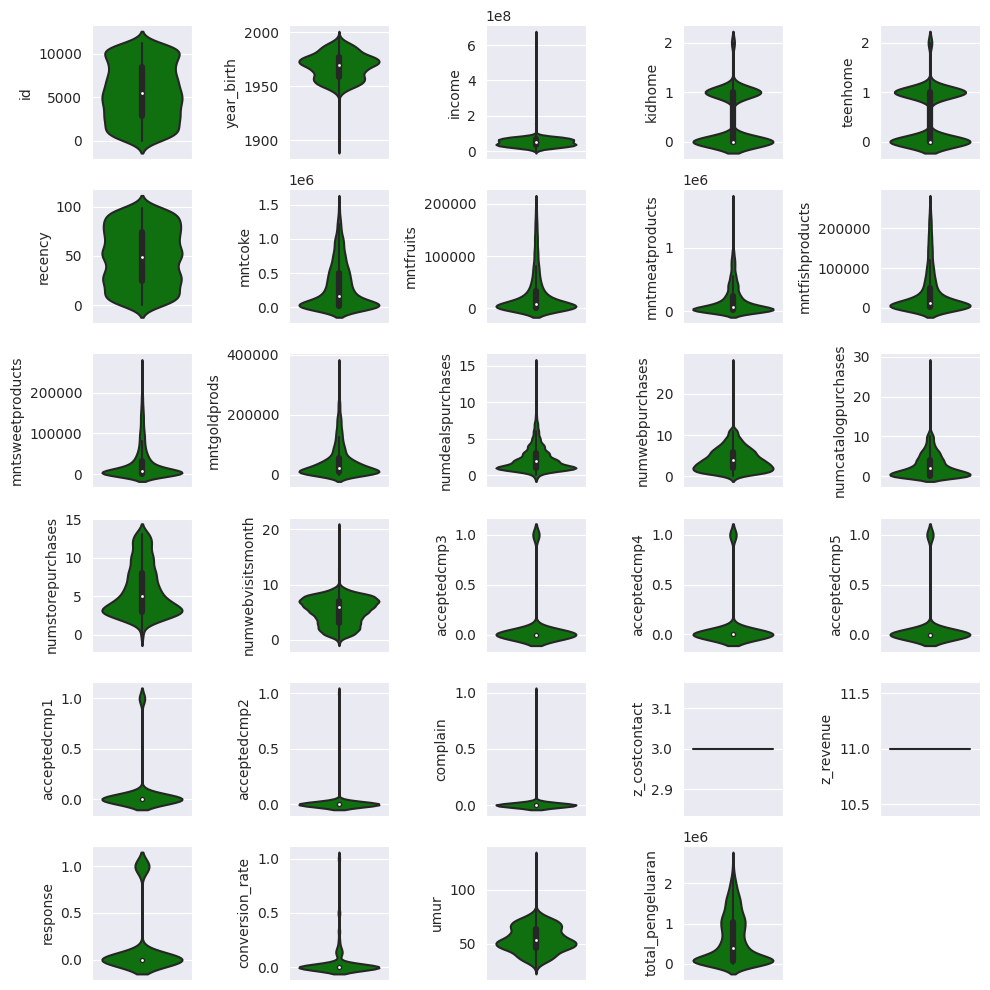

In [27]:
features = num_df
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
  plt.subplot(6, 5, i+1)
  sns.violinplot(y=df[features[i]], color='green')
  plt.tight_layout()

KeyError: ignored

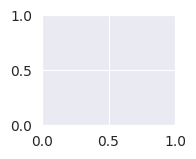

In [30]:
features = cat
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
  plt.subplot(6, 5, i+1)
  sns.countplot(x=df[features[i]], color='green')
  plt.tight_layout()

step by step EDA <br>
raw data into usefull data
1. numerical
2. categorical
3. missing value (visualisasi dengan semua grafik)
4. outliers (pakai box plot)
5. cleaning data

# TASK 1 Analisis Convertion Rate

Analisis conversion rate merupakan suatu pencarian insight data persentase pengunjung website serta tindakann apa saja yang mereka lakukan selama mengunjungi situs, dan apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama berkunjung di website tersebut, hal in dapat dilakukan dengan melakukan featire engeenering pada variable data yang tersaji, sehingga dapat menghasilkan satu kolom baru yaitu Conversion rate.

Setelah Conversion rate terbentuk, maka dapat dianalisis dengan variable lain seperti umur, penghasilan, pengeluaran, dll. sehingga dapat menemukan suatu pola perilaku konsumen.

> Tahapan
1.   Download Dataset
2.   Do feature engineering : conversion rate
3. Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
4. Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
5. Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate





In [ ]:
#